# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

***Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavlijevic***

## Stage 1: Data Cleaning and Preprocessing and EDA

In [2]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


Data Collection and Cleaning.

o Acquire a comprehensive dataset of cleantech texts.

o Perform data cleaning to remove irrelevant information, special characters, and duplicates.

In [3]:
# Setting the path and Loading the data from csv file
from pathlib import Path
print(Path.cwd())

data_folder = Path("/Users/ljubisavljevic/Downloads/cleantech_media_dataset_v1_20231109.csv")
data_folder


/Users/ljubisavljevic/Documents/venv/bin/CLT


PosixPath('/Users/ljubisavljevic/Downloads/cleantech_media_dataset_v1_20231109.csv')

In [4]:
#Opening the kaggle dt file and assigning it to a variable
data = pd.read_csv(data_folder)
data.head()


,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


In [5]:
print(data.shape)
data.info()

(9607, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9607 non-null   int64 
 1   title       9607 non-null   object
 2   date        9607 non-null   object
 3   author      31 non-null     object
 4   content     9607 non-null   object
 5   domain      9607 non-null   object
 6   url         9607 non-null   object
dtypes: int64(1), object(6)
memory usage: 525.5+ KB


We have only 31 authors out 9607 rows of data, and due to data redundancy it is good to drop the authors and drop unneccessary columns

In [6]:
duplicate_rows = data[data.duplicated(subset=['title'])]

In [7]:
print(duplicate_rows)

      Unnamed: 0                                              title  \
820         6483  Macquarie targets North Sea as the green energ...   
891         6557  GE blocked from selling huge offshore turbine ...   
918         6584  Liz Truss opposes solar panels on farmland, Do...   
931         6597  Green hydrogen seen competing with LNG within ...   
987         6656  XR goes big on fake oil in protests at SLB, In...   
992         6661  Aberdeen’ s NZTC plans national centre for geo...   
998         6667  Truss, Johnson Join Rebellion Against Sunak fo...   
1034        6705  BEIS mulls ringfenced CfD support for geotherm...   
1047        6719  Key trends in UK renewables and what to expect...   
1057        6729  Five ways for the energy industry to shift the...   
1074        6747  Staggering potential in next-gen building bloc...   
1116        6790  Royal Opera House drops BP as sponsor after 33...   
3058       37413                   Cleantech Thought Leaders Series   
3059  

In [8]:
#Removing 'duplicate enteries' feature <- many duplicates exist in the dataset
data = data.drop_duplicates(subset=['title'], keep='first')

In [9]:
#resetting index after deleting duplicates
data = data.reset_index(drop=True)

In [10]:
print(data.shape)


(9583, 7)


Out of 9607 -> 9583 rows of data is now having unique information and title after removing duplicates.

In [11]:
# Removing 'author' feature <- many authors are missing
data.drop('author', axis=1, inplace=True)

In [12]:
# Removing 'Unsed columns'
data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
data['content'][0]

'["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainability Report published on Wednesday, QP said its goals include `` reducing the emissions intensity of Qatar\'s LNG facilities by 25% and of its upstream facilities by at least 15%. \'\' The company is also aiming to reduce gas flaring intensity across its upstream facilities by more than 75% and has raised its carbon capture and storage ambitions from 5 million tons/yr to 7 million tons/yr by 2027. About 2.2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project. A further 1.1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar\'s LNG capacity by a further 16 million tons/yr. Qatar currently has an LNG production capacity of around 78 million tons

In [14]:
#import nltk
#nltk.download('punkt')

In [15]:
#import nltk
#nltk.download('stopwords')

In [16]:
#import nltk
#import ssl

#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
#else:
#    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download('punkt')

# Text Preprocessing

In [17]:
# Text preprocessing
porter = PorterStemmer()
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()

    # removing punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    #tokenize the text into words
    tokens = word_tokenize(text)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word.lower() not in stop_words]

    #stemming
    stemmed_tokens= [porter.stem(word) for word in tokens]

    # Join the tokens to strings
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

data['cleaned_content'] = data['content'].apply(preprocess_text)


In [18]:
# Print the first few rows of 'cleaned_content' after cleaning
print("\nAfter Cleaning:")
print(data['cleaned_content'].head())


After Cleaning:
0    qatar petroleum qp target aggress cut greenhou...
1    nuclear power corp india ltd npcil synchron ka...
2    new us presid joe biden took offic week uschin...
3    slow pace japanes reactor restart continu cast...
4    two new york citi largest pension fund say div...
Name: cleaned_content, dtype: object


In [19]:
print(data['cleaned_content'][0])

qatar petroleum qp target aggress cut greenhous ga emiss prepar launch phase 2 plan 48 million ton per year lng expans latest sustain report publish wednesday qp said goal includ reduc emiss intens qatar lng facil 25 upstream facil least 15 compani also aim reduc ga flare intens across upstream facil 75 rais carbon captur storag ambit 5 million tonsyr 7 million tonsyr 2027 22 million tonsyr carbon captur goal come 32 million tonyr phase 1 lng expans also known north field east project 11 million tonsyr come phase 2 known north field south project rais qatar lng capac 16 million tonsyr qatar current lng product capac around 78 million tonsyr eye phase expans 126 million tonsyr qp say abl elimin routin ga flare 2030 methan emiss limit set methan intens target 02 across facil 2025 compani also plan build 16 gigawatt solar energi capac 2025 half come siraj solar power project next year eif jan2220 month littl news phase 2 qatar massiv lng expans mcdermott intern said last week award fronte

 # Explanatory Data Analysis

##### Basic Statistics -- Word Counts, Document Lengths, Term Frequencies

In [20]:

   # calculate word counts, document lengths
# add simple word count
data['word_counts'] = data['cleaned_content'].apply(lambda x: len(str(x).split()))
#add simple document length
data['doc_length'] = data['cleaned_content'].apply(len)
# add polarity
data['polarity'] = data['cleaned_content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)


In [21]:
polarity_fr = data['polarity'][0]
print(polarity_fr)

0.03446969696969697


In [22]:
# Print basic statistics
print("Basic Statistics")
print("Word Counts", data['word_counts'].describe())
print("\nDocument Length ", data['doc_length'].describe())

Basic Statistics
Word Counts count    9583.000000
mean      464.084942
std       264.185780
min       110.000000
25%       263.000000
50%       401.000000
75%       595.000000
max      1813.000000
Name: word_counts, dtype: float64

Document Length  count     9583.000000
mean      3060.117082
std       1739.291273
min        716.000000
25%       1740.000000
50%       2646.000000
75%       3904.000000
max      13333.000000
Name: doc_length, dtype: float64


In [23]:
data.describe(include= [np.number])

,word_counts,doc_length,polarity
count,9583.000000,9583.000000,9583.000000
mean,464.084942,3060.117082,0.091851
std,264.185780,1739.291273,0.074783
min,110.000000,716.000000,-0.318333
25%,263.000000,1740.000000,0.045000
50%,401.000000,2646.000000,0.089216
75%,595.000000,3904.000000,0.136135
max,1813.000000,13333.000000,0.597959


In [24]:
# Term Frequencies
# Compute term frequencies
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform(data['cleaned_content'])

# Print term frequencies
print("Term Frequencies:")
print(term_frequencies)

Term Frequencies:
  (0, 60711)	5
  (0, 57544)	1
  (0, 60773)	6
  (0, 71361)	3
  (0, 12470)	2
  (0, 24875)	1
  (0, 36140)	1
  (0, 34126)	3
  (0, 29532)	3
  (0, 59561)	2
  (0, 45119)	1
  (0, 57658)	7
  (0, 58285)	2
  (0, 7796)	1
  (0, 49858)	9
  (0, 73175)	1
  (0, 57239)	1
  (0, 80292)	2
  (0, 46294)	8
  (0, 31285)	5
  (0, 45064)	1
  (0, 70695)	1
  (0, 62384)	1
  (0, 60368)	1
  (0, 77903)	1
  :	:
  (9582, 64485)	2
  (9582, 67635)	1
  (9582, 26454)	1
  (9582, 42746)	1
  (9582, 40522)	1
  (9582, 43574)	1
  (9582, 76892)	4
  (9582, 51112)	1
  (9582, 23779)	1
  (9582, 52955)	1
  (9582, 68063)	2
  (9582, 41906)	1
  (9582, 33594)	1
  (9582, 63104)	1
  (9582, 19886)	2
  (9582, 46271)	2
  (9582, 49788)	1
  (9582, 14647)	4
  (9582, 69605)	1
  (9582, 51585)	1
  (9582, 14693)	1
  (9582, 26456)	1
  (9582, 78769)	1
  (9582, 69794)	1
  (9582, 80628)	1


In [25]:
# Convert the sparse matrix to a dense array
dense_term_frequencies = term_frequencies.toarray()

# Print the dense array
print("Dense Term Frequencies:")
print(dense_term_frequencies)


Dense Term Frequencies:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:")
print(feature_names)


Feature Names:
['00' '000' '0000' ... 'zwolinski' 'zx' 'zyryanov']


In [ ]:
# Create word clouds to visualize the most frequent terms.
# Combine all cleaned content into a single string
all_text = ' '.join(data['cleaned_content'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

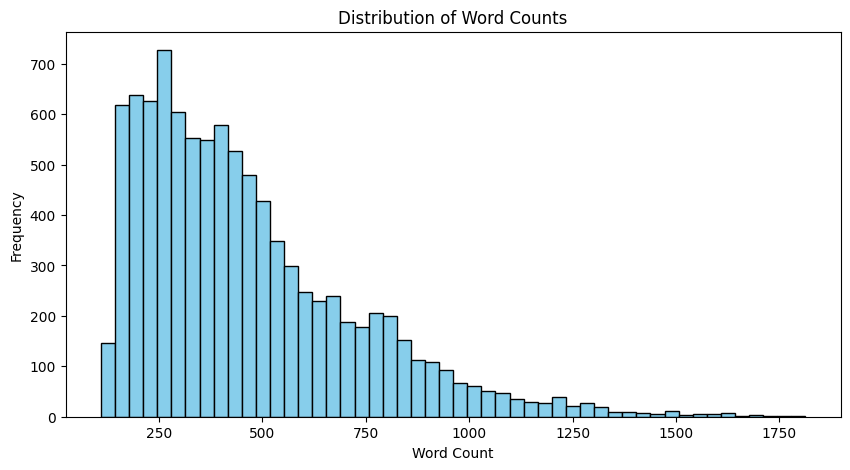

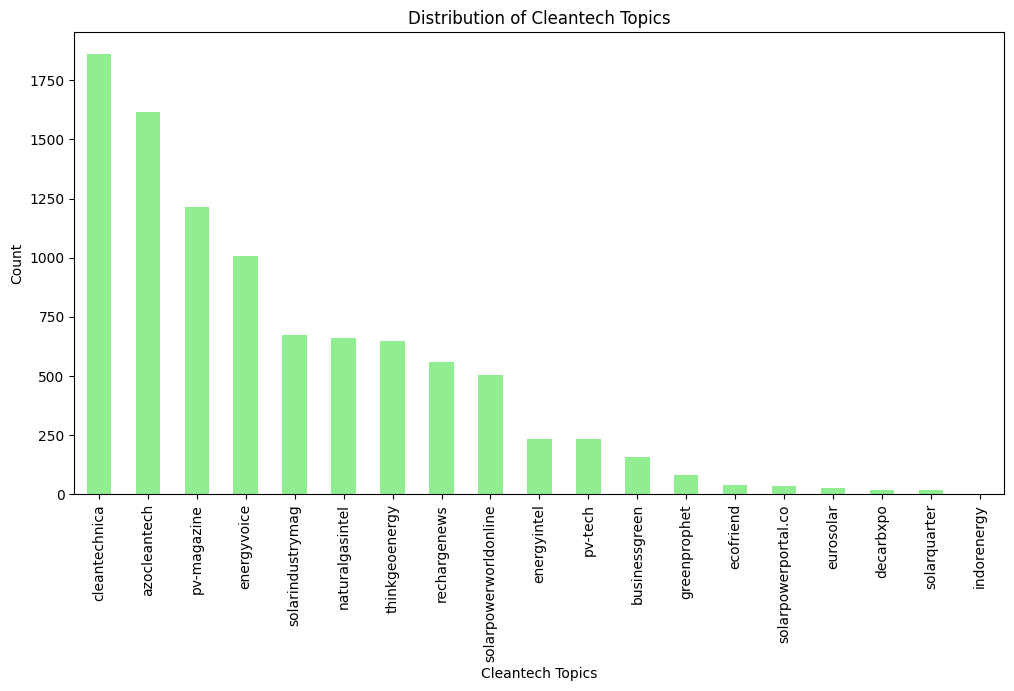

In [28]:
# Plot histogram for word counts
plt.figure(figsize=(10, 5))
plt.hist(data['word_counts'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart for major cleantech topics based on 'domain'
plt.figure(figsize=(12, 6))
data['domain'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Cleantech Topics')
plt.xlabel('Cleantech Topics')
plt.ylabel('Count')
plt.show()

# Modeling

In [29]:
data

,title,date,content,domain,url,cleaned_content,word_counts,doc_length,polarity
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,qatar petroleum qp target aggress cut greenhou...,279,1718,0.034470
1,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,nuclear power corp india ltd npcil synchron ka...,349,2243,0.061111
2,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,new us presid joe biden took offic week uschin...,453,2848,-0.072912
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,slow pace japanes reactor restart continu cast...,429,2838,-0.044561
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,two new york citi largest pension fund say div...,246,1559,-0.070375
...,...,...,...,...,...,...,...,...,...
9578,Strata Clean Energy Nets $ 300 Million in Fund...,2023-11-06,['Strata Clean Energy has closed a $ 300 milli...,solarindustrymag,https://solarindustrymag.com/strata-clean-ener...,strata clean energi close 300 million revolv l...,201,1358,0.095252
9579,Orsted Deploying SparkCognition Renewable Suit...,2023-11-07,['Global renewable energy developer Ørsted is ...,solarindustrymag,https://solarindustrymag.com/orsted-deploying-...,global renew energi develop rsted deploy spark...,228,1553,0.078586
9580,Veolia Has Plans for 5 MW of Solar in Arkansas,2023-11-07,"['Veolia North America, a provider of environm...",solarindustrymag,https://solarindustrymag.com/veolia-has-plans-...,veolia north america provid environment solut ...,213,1353,0.129367
9581,"SunEdison: Too Big, Too Fast?",2023-11-08,['Once the self-proclaimed “ leading renewable...,solarindustrymag,http://www.solarindustrymag.com/online/issues/...,selfproclaim lead renew power plant develop wo...,971,6559,0.064813


In [46]:
import warnings
warnings.filterwarnings('ignore')

## LDA

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data to get term frequencies
term_frequencies = vectorizer.fit_transform(data['cleaned_content'])

# Number of topics
n_topics = 6

# Create LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# Fit the model to your term frequencies
lda.fit(term_frequencies)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Number of top words to display for each topic
no_top_words = 10

# Displaying topics
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
energi solar year new market invest us renew project electr
Topic 1:
energi wind group media dn offshor project data use recharg
Topic 2:
ga natur said price lng ngi market oil daili product
Topic 3:
energi electr hydrogen batteri use power new vehicl charg compani
Topic 4:
energi develop project technolog solar provid use industri research azocleantech
Topic 5:
energi geotherm pv data solar use project websit power cooki


In [31]:
import pyLDAvis

# Prepare the visualization data
prepared_data = pyLDAvis.prepare(
    topic_term_dists=lda.components_, 
    doc_topic_dists=lda.transform(term_frequencies), 
    doc_lengths=[len(doc) for doc in data['cleaned_content']], 
    vocab=vectorizer.get_feature_names_out(), 
    term_frequency=np.sum(term_frequencies, axis=0).A1
)

# Display the interactive visualization
pyLDAvis.display(prepared_data)


In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_clouds(model, feature_names, n_words, n_cols=2):
    n_topics = len(model.components_)
    n_rows = n_topics // n_cols + (n_topics % n_cols > 0)

    plt.figure(figsize=(15, n_rows * 5))

    for topic_idx, topic in enumerate(model.components_):
        # Generate the word cloud data
        wordcloud_data = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}

        # Create word cloud
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(wordcloud_data)

        # Create subplot
        plt.subplot(n_rows, n_cols, topic_idx + 1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic {topic_idx}')

    # Adjust the spacing
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    plt.tight_layout()
    plt.show()

# Create and display word clouds in a grid
create_word_clouds(lda, feature_names, 20)  # Adjust the number of words and columns as needed


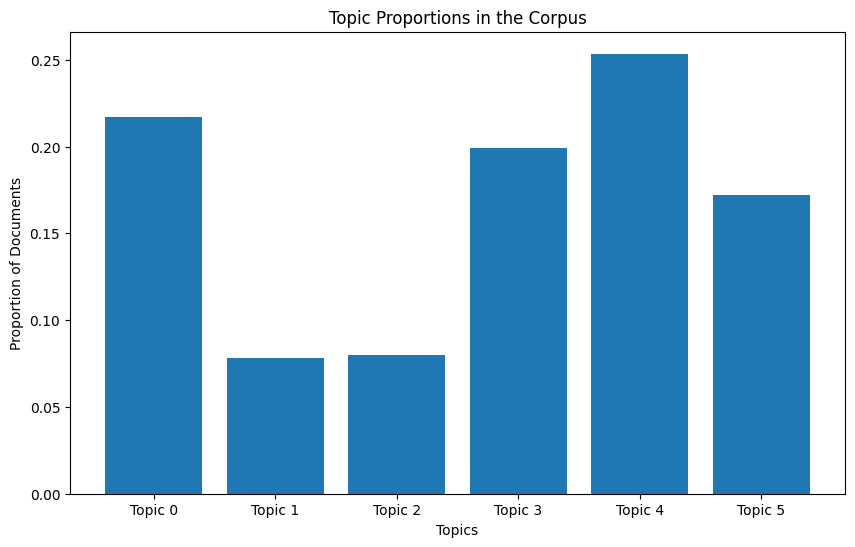

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Get the topic distribution for each document
topic_distributions = lda.transform(term_frequencies)

# Calculate the proportion for each topic
topic_proportions = np.mean(topic_distributions, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(topic_proportions)), topic_proportions, tick_label=[f'Topic {i}' for i in range(len(topic_proportions))])
plt.xlabel('Topics')
plt.ylabel('Proportion of Documents')
plt.title('Topic Proportions in the Corpus')
plt.show()


## NMF

In [34]:
from sklearn.decomposition import NMF

# Number of topics
n_topics = 6  

# Create NMF model
nmf = NMF(n_components=n_topics, random_state=0)

# Fit the model to your term frequencies
W = nmf.fit_transform(term_frequencies)  # Document-topic matrix
H = nmf.components_  # Topic-term matrix

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Number of top words to display for each topic
no_top_words = 10

# Displaying topics
display_topics(nmf, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
solar energi pv project power data instal storag us renew
Topic 1:
use plastic azocleantech develop research technolog environment women provid spoke
Topic 2:
energi geotherm project develop power heat renew technolog new gener
Topic 3:
ga natur said price market ngi year lng energi oil
Topic 4:
electr batteri vehicl ev charg tesla new year cleantechnica car
Topic 5:
hydrogen green energi fuel use wind renew industri power produc


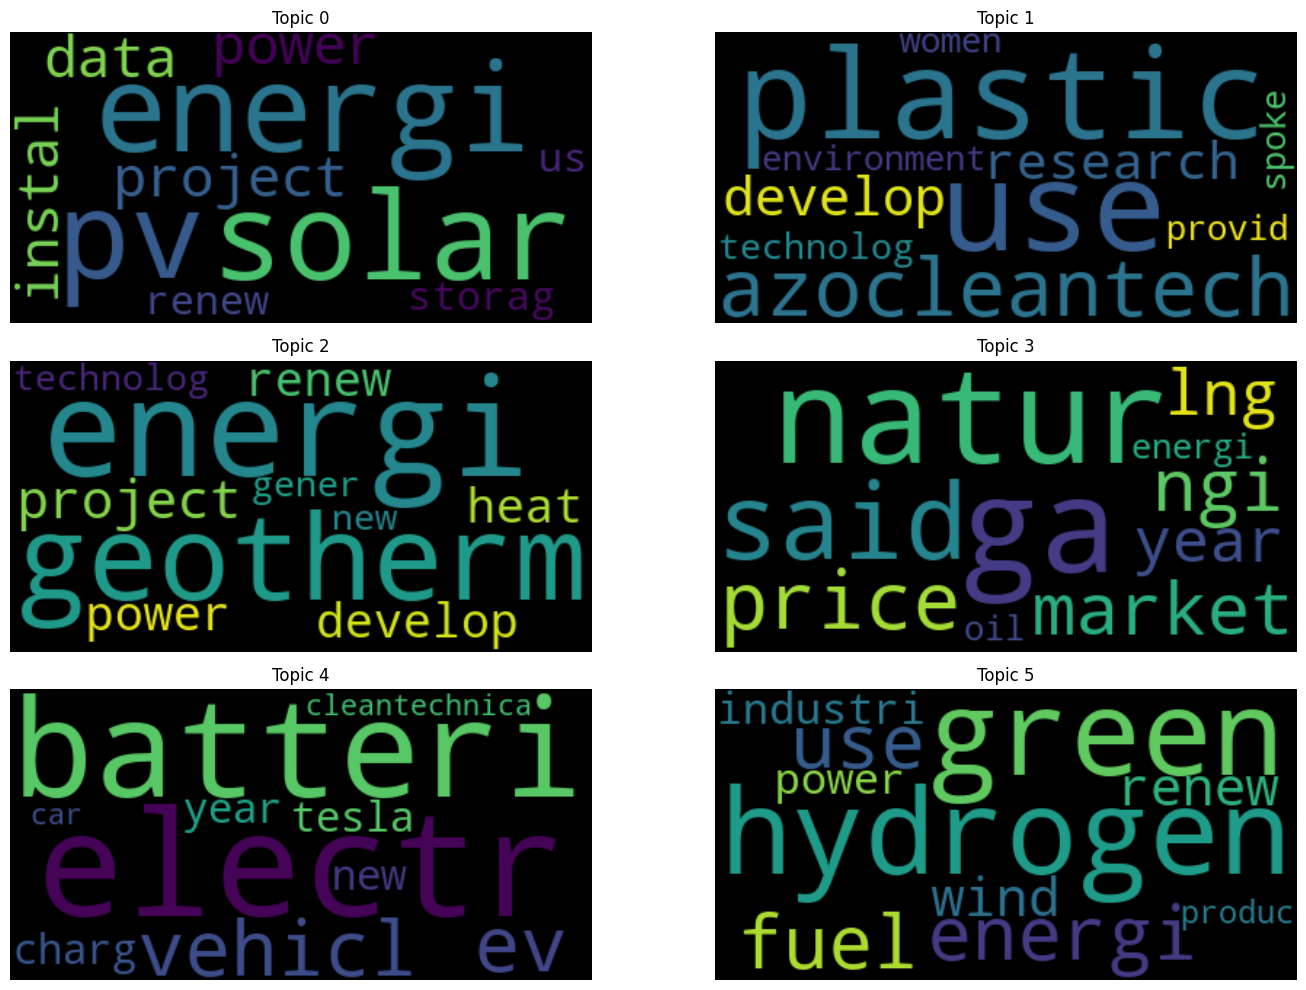

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def display_wordclouds_as_array(model, feature_names, no_top_words):
    n_topics = len(model.components_)
    n_cols = 2  # Number of columns in the grid
    n_rows = (n_topics + 1) // n_cols  # Calculate the number of rows based on topics

    plt.figure(figsize=(15, 10))

    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        wordcloud = WordCloud(width=400, height=200).generate(" ".join(topic_words))
        
        # Create a subplot for each topic
        plt.subplot(n_rows, n_cols, topic_idx + 1)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()

# Display word clouds for topics in an array
display_wordclouds_as_array(nmf, vectorizer.get_feature_names_out(), no_top_words)


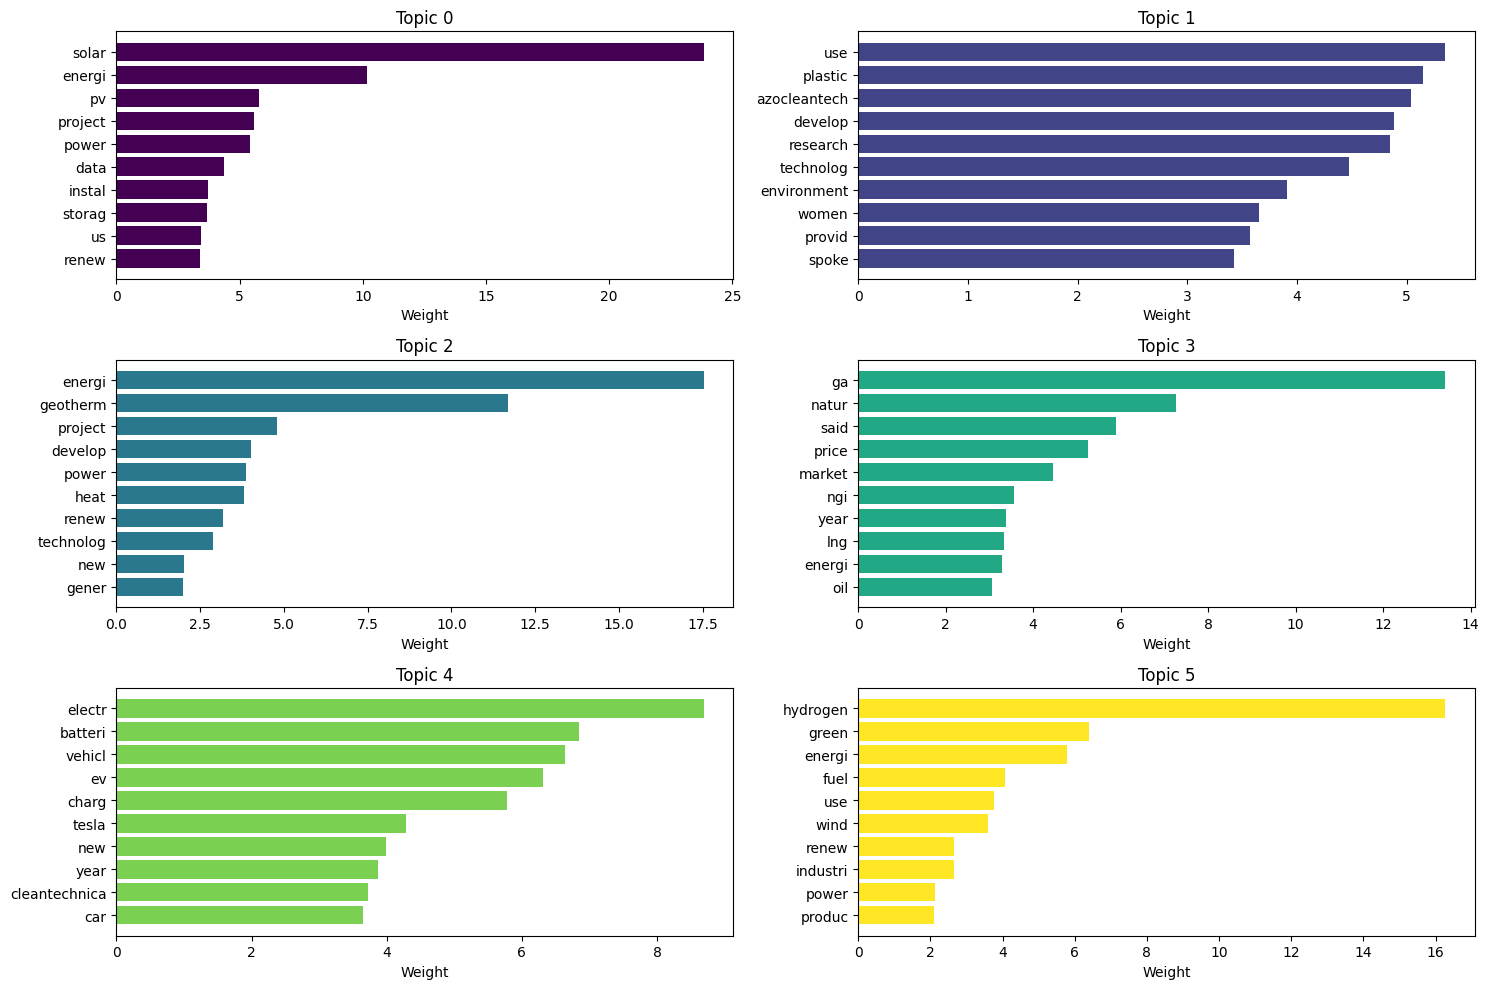

In [36]:
import matplotlib.pyplot as plt

def display_top_words_bar_chart_colored(model, feature_names, no_top_words):
    n_topics = len(model.components_)
    n_cols = 2  
    n_rows = (n_topics + 1) // n_cols  

    # Define a list of colors for topics
    topic_colors = plt.cm.viridis(np.linspace(0, 1, n_topics))  # You can choose a different colormap

    plt.figure(figsize=(15, 10))
    
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_weights = [topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        color = topic_colors[topic_idx]  # Get a unique color for each topic
        
        # Create a subplot for each topic
        plt.subplot(n_rows, n_cols, topic_idx + 1)
        plt.barh(topic_words, topic_weights, color=color)
        plt.gca().invert_yaxis()
        plt.xlabel('Weight')
        plt.title(f"Topic {topic_idx}")

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()

# Display bar charts
display_top_words_bar_chart_colored(nmf, vectorizer.get_feature_names_out(), no_top_words)


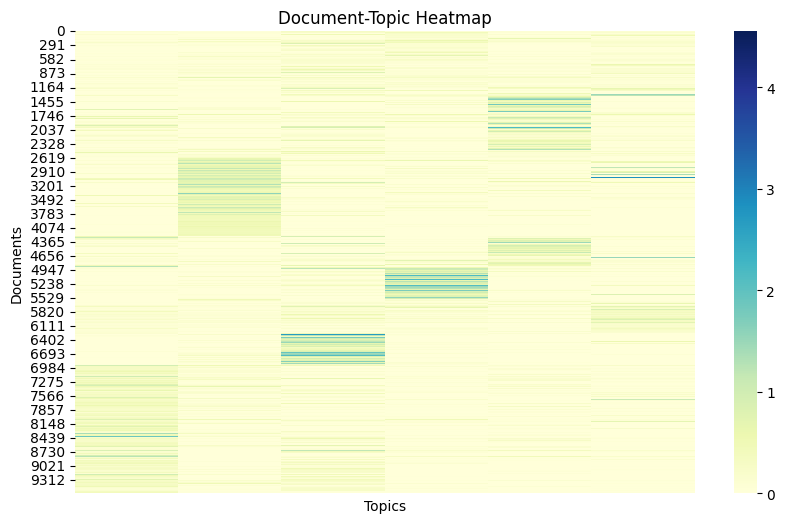

In [37]:
import seaborn as sns

def display_topic_document_heatmap(W):
    plt.figure(figsize=(10, 6))
    sns.heatmap(W, cmap='YlGnBu', xticklabels=False)
    plt.xlabel('Topics')
    plt.ylabel('Documents')
    plt.title('Document-Topic Heatmap')
    plt.show()

# Display heatmap for document-topic matrix
display_topic_document_heatmap(W)


## BERTopic

In [38]:
from bertopic import BERTopic

documents = data['cleaned_content'].tolist()

# Create a BERTopic instance
bertopic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model to your documents
topics, probabilities = bertopic_model.fit_transform(documents)

# The 'topics' variable contains the topic for each document
# The 'probabilities' variable contains the probability of the assigned topic for each document


2023-11-29 12:43:24,287 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/300 [00:00<?, ?it/s]

2023-11-29 12:46:48,746 - BERTopic - Embedding - Completed ✓
2023-11-29 12:46:48,746 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-11-29 12:46:59,972 - BERTopic - Dimensionality - Completed ✓
2023-11-29 12:46:59,972 - BERTopic - Cluster - Start clustering the reduced embeddings
/Users/ljubisavljevic/Documents/venv/lib/python3.11/site-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)
2023-11-29 12:47:02,913 - BERTopic - Cluster - Completed ✓
2023-11-29 12:47:02,915 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-11-29 12:47:05,421 - BERTopic - Representation - Completed ✓


In [45]:
# Visualizing topics with their sizes
bertopic_model.visualize_topics()

In [49]:
# Visualizing the distribution of topics over time (if you have timestamps)
# topic_model.visualize_topics_over_time(topics_over_time)  # You need to create 'topics_over_time'

# Visualizing the topic hierarchy
bertopic_model.visualize_hierarchy()

In [41]:
# Visualizing terms for a few topics
bertopic_model.visualize_barchart(topics=[0, 1, 2, 3, 4, 5])

In [42]:
# Reduce the number of topics
#bertopic_model.reduce_topics(docs=documents, nr_topics=50)

## Top2Vec

In [43]:
from top2vec import Top2Vec

# Prepare the documents
documents = data['cleaned_content'].tolist()

# Train the Top2Vec model
top2vec_model = Top2Vec(documents)

# Displaying Top2Vec topics
#topics = top2vec_model.get_topics()


ImportError: universal-sentence-encoder-multilingual is not available.

Try: pip install top2vec[sentence_encoders]

Alternatively try: pip install tensorflow tensorflow_hub tensorflow_text